In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [4]:
X

array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147],
       [-0.49776571,  0.76955129],
       [-0.31914906, -0.84899624],
       [-0.57839322, -0.49081236],
       [-0.53350227,  0.58056527],
       [-0.24733259,  0.73011595],
       [ 0.41030774, -0.73075986],
       [ 0.17181003, -0.92504802],
       [ 0.65917045,  0.62120588],
       [ 0.87625577,  0.12510879],
       [ 0.81946243, -0.01347859],
       [-0.47960986, -0.7880243 ],
       [-0.90187751, -0.70895455],
       [ 0.74827659, -0.55976747],
       [-0.74875324, -0.37153443],
       [ 0.23161178,  1.01205842],
       [ 0.81387506,  0.22821311],
       [-0.92169575,  0.20310719],
       [ 0.74650434, -0.35861224],
       [ 0.01330079,  0.68169193],
       [-0.72651409,  0.58630948],
       [-0.33930852, -1.0080984 ],
       [ 0.49009938, -0.62509577],
       [-0.9539309 , -0.33410313],
       [ 0.6927241 ,

<Axes: >

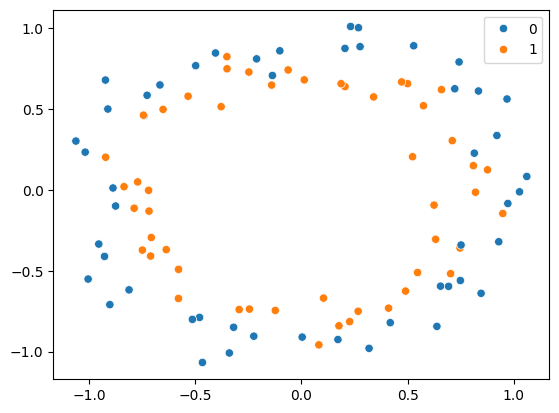

In [7]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

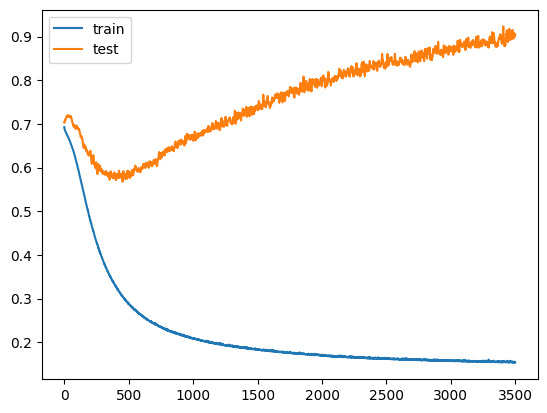

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


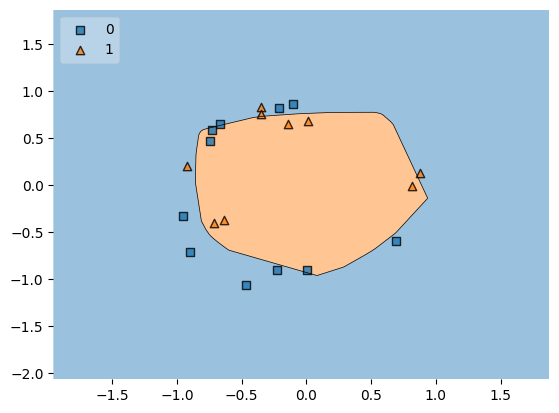

In [16]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [17]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6328 - loss: 0.6537 - val_accuracy: 0.3000 - val_loss: 0.7152
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6391 - loss: 0.6471 - val_accuracy: 0.3000 - val_loss: 0.7158
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6391 - loss: 0.6519 - val_accuracy: 0.3000 - val_loss: 0.7155
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6508 - loss: 0.6472 - val_accuracy: 0.3000 - val_loss: 0.7164
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6609 - loss: 0.6472 - val_accuracy: 0.2500 - val_loss: 0.7150
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6812 - loss: 0.6432 - val_accuracy: 0.3000 - val_loss: 0.7119
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6695 - loss: 0.6489 - val_accuracy: 0.3500 - val_loss: 0.7088
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6531 - loss: 0.6470 - val_accuracy: 0.5500 - v

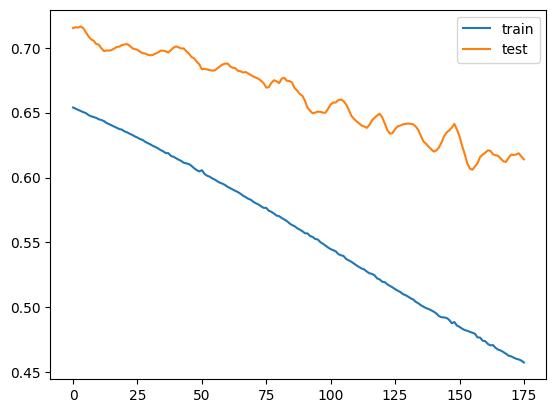

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


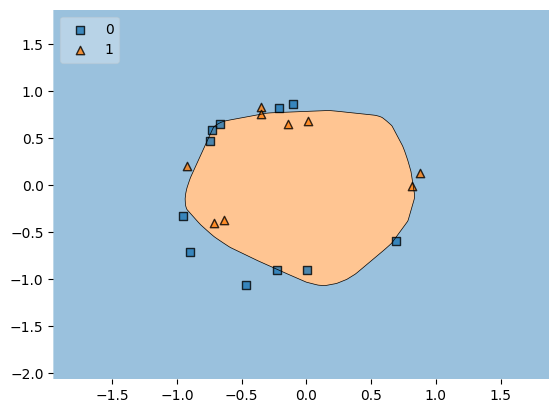

In [26]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()